In [3]:
!pip install pennylane torch pennylane-rigetti

  Using cached PennyLane-0.37.0-py3-none-any.whl (1.8 MB)
     |████████████████████████████▉   | 717.1 MB 63.0 MB/s eta 0:00:02                  | 110.9 MB 125.3 MB/s eta 0:00:06 151.7 MB 125.3 MB/s eta 0:00:06█▎                         | 157.4 MB 125.3 MB/s eta 0:00:06B 105.2 MB/s eta 0:00:06�█████████▏                | 376.9 MB 39.5 MB/s eta 0:00:11 s eta 0:00:10 ███████▋             | 464.9 MB 43.9 MB/s eta 0:00:08  498.5 MB 102.6 MB/s eta 0:00:03██████████████▏          | 526.6 MB 102.6 MB/s eta 0:00:03.3 MB 110.8 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 797.2 MB 13 kB/s               B 59.9 MB/s eta 0:00:01 
  Using cached PennyLane_Rigetti-0.36.0-py3-none-any.whl (27 kB)
  Using cached PennyLane_Lightning-0.37.0-cp39-cp39-manylinux_2_28_x86_64.whl (15.5 MB)
  Using cached autograd-1.6.2-py3-none-any.whl (49 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached autoray-0.6.12-py3-none-any.whl (50 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
     |███████████████████████▎        | 482.8 MB 141.9 MB/s eta 0:00:02                   | 45.7 MB 60.7 MB/s eta 0:00:11��███▉                     | 225.7 MB 109.9 MB/s eta 0:00:04MB/s eta 0:00:04�█████████▉                | 329.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 664.8 MB 4.5 kB/s              ��██████████████████▉    | 578.1 MB 132.3 MB/s eta 0:00:01��█████████████▎   | 587.7 MB 132.3 MB/s eta 0:00:01��██████████████▍| 652.5 MB 112.0 MB/s eta 0:00:01
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
     |████████████████████████████████| 209.4 MB 85 kB/s              �                       | 57.1 MB 79.2 MB/s eta 0:00:02 | 117.2 MB 66.6 MB/s eta 0:00:02��█████████████████████         | 151.0 MB 60.9 MB/s eta 0:00:01█████▏       | 158.1 MB 60.9 MB/s eta 0:00:01��█████▏      | 164.3 MB 60.9 MB/s eta 0:00:01
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_

In [4]:
import pennylane as qml
import pennylane.numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from pennylane.operation import Operation, AnyWires

In [5]:
#class Rig_RyTh1(Operation):
#    num_wires = 1  
#
#    def __init__(self, theta, wires, id=None):
#        all_wires = qml.wires.Wires(wires)
#        super().__init__(theta, wires=all_wires, id=id)
#
#    @staticmethod
#    def compute_decomposition(theta, wires):
#        decomp = [
#                qml.RX(np.pi/2.,wires=wires[0]),
#                qml.RZ(-theta,wires=wires[0]),
#                qml.RX(-np.pi/2.,wires=wires[0]),
#            ]
#        return decomp
#    
#class Rig_RzTh1(Operation):
#    num_wires = 1  
#
#    def __init__(self, theta, wires, id=None):
#        all_wires = qml.wires.Wires(wires)
#        super().__init__(theta, wires=all_wires, id=id)
#
#    @staticmethod
#    def compute_decomposition(theta, wires):
#        decomp = [
#                qml.RZ(theta,wires=wires[0]),
#            ]
#        return decomp
    
#class Rig_RyzTh1(Operation):
#    num_wires = 1  
#
#    def __init__(self, thetas, wires, id=None):
#        all_wires = qml.wires.Wires(wires)
#        super().__init__(thetas, wires=all_wires, id=id)
#
#    @staticmethod
#    def compute_decomposition(theta, wires):
#        decomp = [
#                qml.RX(np.pi/2.,wires=wires[0]),
#                qml.RZ(-thetas[0],wires=wires[0]),
#                qml.RX(-np.pi/2.,wires=wires[0]),
#                qml.RZ(thetas[1],wires=wires[0]),
#            ]
#        return decomp
#    
#class Rig_iSWAP(Operation):
#    num_wires = 2  
#
#    def __init__(self, theta, wires, id=None):
#        all_wires = qml.wires.Wires(wires)
#        super().__init__(theta, wires=all_wires, id=id)
#
#    @staticmethod
#    def compute_decomposition(theta, wires):
#        decomp = [
#                qml.RX(np.pi/2.,wires=wires[0]),
#                qml.RZ(-theta,wires=wires[0]),
#                qml.RX(-np.pi/2.,wires=wires[0]),
#            ]
#        return decomp
#    
#class Rig_CZ(Operation):
#    num_wires = 2  
#
#    def __init__(self, wires, id=None):
#        all_wires = qml.wires.Wires(wires)
#        super().__init__(wires=all_wires, id=id)
#
#    @staticmethod
#    def compute_decomposition(wires):
#        decomp = [
#                qml.CZ(wires=wires),
#            ]
#        return decomp

In [58]:
import pennylane.numpy as np


device_name = 'Ankaa-9Q-3'
n_qubits=9
n_features=13
dev = qml.device("rigetti.qvm", device=device_name)

s=0.05
init_method=lambda x: torch.nn.init.uniform_(x,a=0.,b=s*np.pi)

Conn_map=[
    [[4,1],[3,0],[5,2],[7,8]],
    [[4,3],[1,0],[7,6],[5,8]],
    [[4,7],[3,6],[1,0],[5,2]],
    [[4,5],[7,8],[1,2],[3,0]],
]
excl_qbts=[[6,], [2,], [8,], [6,]]

n_layers=2

n_pars=n_layers*18*5 #+4*3+3
@qml.qnode(dev, diff_method="spsa")
def probs_single_custom(inputs, weights):
#    for fi in range(0, n_features):
#        qi=fi%n_qubits
#        gat=Rig_RyTh1 if fi<n_qubits else Rig_RzTh1
#        gat(inputs[...,fi],wires=qi,id=f"$\\alpha_{{{{{fi}}}}}$")
    
    
    theta_i=0
    for lay_i in range(n_layers): 
        # input injection
        for fi in range(0, n_features):
            qi=fi%n_qubits
            #gat=Rig_RyTh1 if fi<n_qubits else Rig_RzTh1
            ft_idx=fi if lay_i%2==0 else n_features-fi-1
            if fi<n_qubits:
                qml.RX(np.pi/2.,wires=qi)
                qml.RZ(-inputs[...,ft_idx],wires=qi)
                qml.RX(-np.pi/2.,wires=qi)
            else:
                qml.RZ(inputs[...,ft_idx],wires=qi)
            #gat(inputs[...,ft_idx],wires=qi,id=f"$\\alpha_{{{{{fi}}}}}$")
            
        # parameterized circuit injection
        for nn_i, nn_conn in enumerate(Conn_map): 
            for qi_qj in nn_conn:
                #Rig_CZ(wires=qi_qj)
                qml.CZ(wires=qi_qj)
            for qi in range(n_qubits):
                if qi in excl_qbts[nn_i]:
                    continue
                #Rig_RyTh1(weights[lay_i][theta_i],wires=qi,id=f"$\\theta_{{{{{lay_i,theta_i}}}}}$")
                qml.RX(np.pi/2.,wires=qi)
                qml.RZ(-weights[lay_i][theta_i],wires=qi)
                qml.RX(-np.pi/2.,wires=qi)
                #Rig_RzTh1(weights[lay_i][theta_i+1],wires=qi,id=f"$\\theta_{{{{{lay_i,theta_i+1}}}}}$")
                qml.RZ(weights[lay_i][theta_i+1],wires=qi)
                theta_i+=2
        
    return qml.probs(wires=range(0,9))
    
weight_shapes = {"weights": (n_layers, n_pars)}
qlayer = qml.qnn.TorchLayer(probs_single_custom, weight_shapes,init_method=init_method)

/opt/conda/lib/python3.9/site-packages/pennylane/math/utils.py:228: UserWarning: Contains tensors of types {'torch', 'autograd'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(
/opt/conda/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/conda/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/conda/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/conda/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 

(<Figure size 6100x1000 with 1 Axes>, <Axes:>)

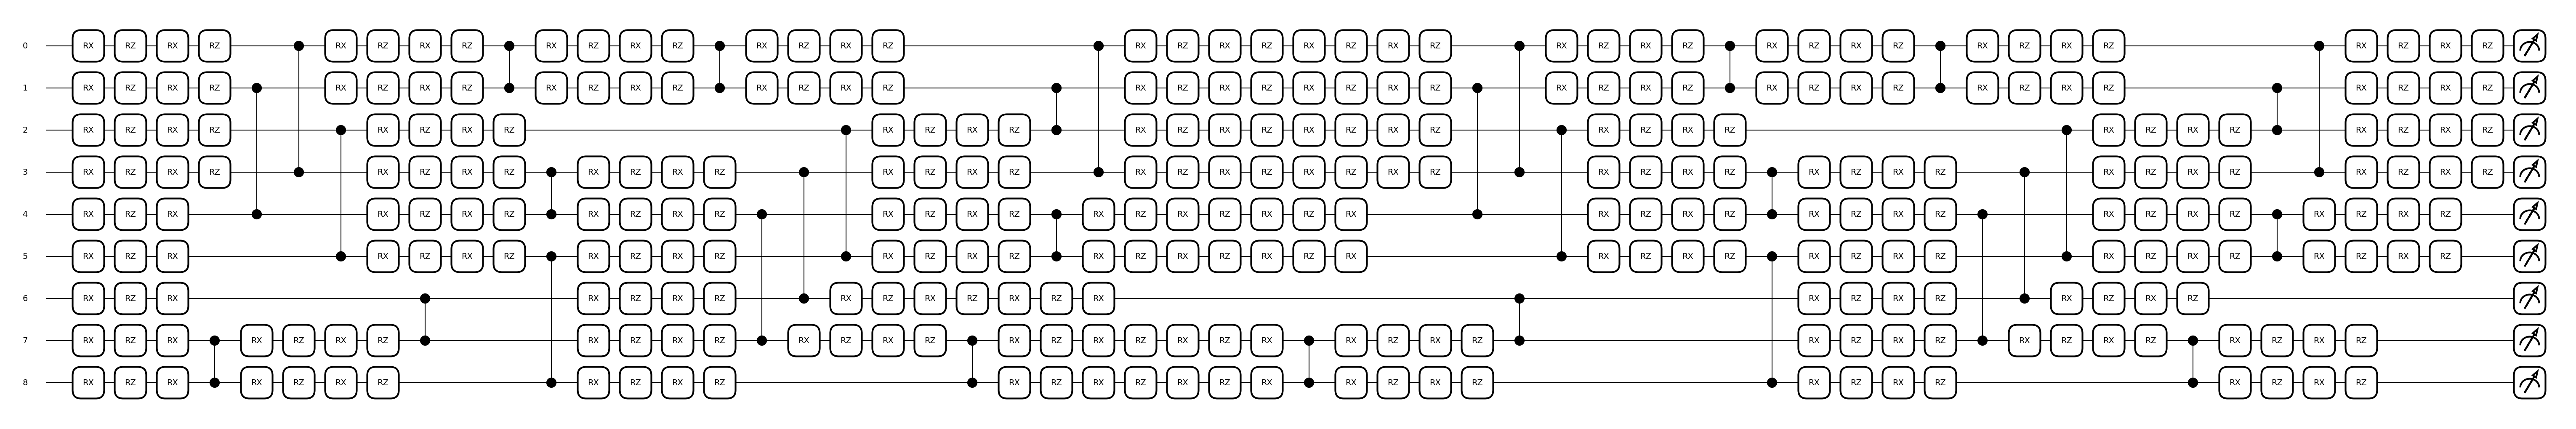

In [59]:
%matplotlib inline
qml.draw_mpl(probs_single_custom)(torch.rand(13),np.random.random(weight_shapes['weights']))

In [60]:
#mp_f=lambda i,b: (0.5*(1+(-1)**((i//(2**b))%2)))
mp_f=lambda i,b: (-1)**((i//(2**b))%2)
Mat=torch.tensor([[2.0*(mp_f(i,j)+mp_f(i,j+1)+mp_f(i,j+2)) for j in range(0,9,3)] for i in range(2**9)],requires_grad=False)
import torch.nn as nn
class ProbsToclassLayer(nn.Module):
    def __init__(self):
        super(ProbsToclassLayer, self).__init__()

    def forward(self, input_var):
        return input_var[...,:]@Mat

In [61]:
wine = datasets.load_wine()
#print(wine.data.shape,  len(np.unique(wine.target)) )

n_features=wine.data.shape[1]
xy_labels=[(wine.data[idx,:],wine.target[idx]) for idx in range(len(wine.data))]
feature_list=[[x_lab[ft_i] for x_lab,y_lab in xy_labels] for ft_i in range(n_features)]

#standardize features
mean_std_list=[[np.mean(feature_list[ft_i]),np.std(feature_list[ft_i])] for ft_i in range(n_features)]
xy_labels_stdd=[([(el[0][ft_i]-mean_std_list[ft_i][0])/mean_std_list[ft_i][1] for ft_i in range(n_features)],el[1]) for ei,el in enumerate(xy_labels)]
#norms_list=[np.sqrt(np.sum([val**2 for val in el[0]])) for el in xy_labels_stdd]
#xy_labels_stdd=[([val/norms_list[ei] for val in el[0]],el[1]) for ei,el in enumerate(xy_labels_stdd)]
xy_labels=xy_labels_stdd
#xy_labels

X=np.array([x for x,y in xy_labels_stdd])
y_=np.array([y for x,y in xy_labels_stdd])
#y = torch.unsqueeze(torch.tensor(y,requires_grad=False), 1)
#y_hot = torch.scatter(torch.zeros((200, 2),requires_grad=False), 1, y_, 1)
X = torch.tensor(X, requires_grad=False).float()
y = torch.tensor(y_, requires_grad=False).long()

In [62]:
import matplotlib.pyplot as plt
def test_plot_model(y_pred):
    pbs_arr=[]
    for xii, (x_lab, y_lab) in enumerate(zip(X,y)):
        pbs=y_pred[xii].detach().numpy()
        pbs_arr.append(pbs[:])
        idx_max=np.argmax(pbs[:])
    #    y_lab_pred="0" if idx_max==1 else "1"
#        print(int(y_lab), " ", idx_max, " ", pbs)
    pbs_arr=np.array(pbs_arr)
    colors=['g','b','r']
    color_points=[colors[yv] for yv in y]
    fig,ax=plt.subplots()
    ax.scatter(pbs_arr[:,1],pbs_arr[:,2],c=color_points,alpha=0.5,s=5)
    plt.show()

In [63]:
import pennylane.numpy as np
#clayer1=nn.Linear(8,8)
#softmax1=nn.Softmax(dim=1)
#sigmoid1=nn.Sigmoid()
#clayer2=nn.Linear(16,3)
#torch.nn.init.uniform_(clayer2.weight,b=0.1) 
softmax=nn.Softmax(dim=1)
probs2class=ProbsToclassLayer()
#layers = [qlayer1,qlayer2,clayer2,softmax2]
layers = [qlayer,probs2class,softmax]
model = torch.nn.Sequential(*layers)
#model.apply(init_method)

#opt = torch.optim.SGD(model.parameters(), lr=0.1)
opt = torch.optim.Adam(model.parameters(),lr=0.1)
#opt = torch.optim.SPSA(model.parameters(),lr=0.1)
#opt = torch.optim.Adam(model.parameters(),lr=0.05)
#loss = torch.nn.MSELoss()

loss = torch.nn.CrossEntropyLoss()
for pr in model.parameters():
    print(pr)

Parameter containing:
tensor([[0.0895, 0.1035, 0.0509, 0.1043, 0.1541, 0.1013, 0.1285, 0.0311, 0.0758,
         0.1099, 0.1039, 0.1506, 0.1538, 0.0086, 0.0793, 0.0690, 0.0011, 0.0004,
         0.1067, 0.1222, 0.0391, 0.0097, 0.1159, 0.1404, 0.0516, 0.0633, 0.0237,
         0.0727, 0.0235, 0.0633, 0.1231, 0.1037, 0.1461, 0.1168, 0.0372, 0.1184,
         0.1491, 0.0021, 0.0524, 0.1113, 0.1379, 0.0155, 0.1172, 0.0396, 0.0406,
         0.1016, 0.0345, 0.0632, 0.1256, 0.1194, 0.0584, 0.0200, 0.1313, 0.1396,
         0.0417, 0.0351, 0.0699, 0.1334, 0.1485, 0.1157, 0.0230, 0.0761, 0.0569,
         0.1057, 0.1190, 0.1086, 0.1269, 0.0199, 0.1186, 0.1428, 0.0205, 0.0502,
         0.1521, 0.0333, 0.0227, 0.0583, 0.0538, 0.0846, 0.0261, 0.1143, 0.1292,
         0.0974, 0.0810, 0.0194, 0.0766, 0.0251, 0.1372, 0.0279, 0.0999, 0.1096,
         0.1276, 0.0486, 0.0089, 0.1270, 0.0590, 0.1171, 0.0899, 0.0717, 0.0454,
         0.0056, 0.0957, 0.0332, 0.0177, 0.0582, 0.0828, 0.1269, 0.0772, 0.1008,
      

In [ ]:
%matplotlib inline
import pennylane.numpy as np

#y = y_hot.float()
#y_hot = y_hot.float()

batch_size = 2
batches = 200 // batch_size

data_loader = torch.utils.data.DataLoader(
    list(zip(X, y)), batch_size=batch_size, shuffle=True, drop_last=True
)

epochs = 30

loss_list=[]
for epoch in range(epochs):
    running_loss = 0

    for xs, ys in data_loader:
        #print("step")
        opt.zero_grad()

        #print(xs,ys)
        loss_evaluated = loss(model(xs), ys)
        #print("ev loss:")
        loss_val=loss_evaluated.detach().numpy()
        loss_list.append(loss_val)
        #print("loss:",loss_val)
        
        loss_evaluated.backward()
        #print("back")
        print(xs, model(xs),ys,loss_val)
        
        opt.step()
        
        running_loss += loss_evaluated
#    y_pred = model(X)
#    test_plot_model(y_pred)

    avg_loss = running_loss / batches
    print("Average loss over epoch {}: {:.4f}".format(epoch + 1, avg_loss))

predictions = torch.argmax(y_pred, axis=1).detach().numpy()

correct = [1 if p == p_true else 0 for p, p_true in zip(predictions, y)]
accuracy = sum(correct) / len(correct)
print(f"Accuracy: {accuracy * 100}%")

tensor([[-0.8284, -1.2086, -1.5225, -1.4098,  2.5458, -0.6331, -0.1800, -0.0955,
          2.0484, -0.7172,  0.4499, -0.4261,  0.0099],
        [-1.9154,  0.0571,  0.1955,  0.1517, -0.2627,  0.9692,  0.7637, -0.3373,
          0.4189, -0.7821, -0.6908,  1.0993, -0.3882]]) tensor([[0.4416, 0.4939, 0.0645],
        [0.2596, 0.5778, 0.1626]], grad_fn=<SoftmaxBackward0>) tensor([1, 1]) 0.9630248
tensor([[-1.3966,  1.7717,  0.0858,  0.4519, -1.2457,  0.9051,  1.0047, -1.2236,
          2.3112, -0.9768, -0.9102,  1.4524, -1.1684],
        [ 0.5057,  1.3498, -0.9011, -0.2087, -0.6840,  0.2482,  0.6533, -0.7401,
         -0.1943, -0.3366, -0.2082,  0.5485,  0.9175]]) tensor([[0.2938, 0.4617, 0.2444],
        [0.1242, 0.8646, 0.0111]], grad_fn=<SoftmaxBackward0>) tensor([1, 0]) 1.178498
tensor([[ 0.0610, -0.2570,  3.1198,  1.6531,  1.7033,  0.5366,  0.6533,  0.8714,
          0.5766, -0.6394,  0.7570,  0.8310,  0.2647],
        [ 0.3451, -0.6251,  1.7307, -1.1996,  0.7203,  0.4885,  0.6533, -0.

In [ ]:
%pylab inline
plot(loss_list)

In [ ]:
pbs_arr=[]
for xii, (x_lab, y_lab) in enumerate(zip(X,y)):
    pbs=y_pred[xii].detach().numpy()
    pbs_arr.append(pbs[:])
    idx_max=np.argmax(pbs[:])
#    y_lab_pred="0" if idx_max==1 else "1"
    print(int(y_lab), " ", idx_max, " ", pbs)
pbs_arr=np.array(pbs_arr)

In [ ]:
%pylab inline
colors=['g','b','r']
color_points=[colors[yv] for yv in y]
scatter(pbs_arr[:,1],pbs_arr[:,2],c=color_points,alpha=0.5,s=5)

In [ ]:
print(f"Accuracy: {accuracy * 100}%")